In [4]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# === Pull asteroid IDs from NASA NEO Browse endpoint ===
api_key =  "8rYRbfxJu447RUeWzEpsqXAbgMnesrP5XiUBo6DJ"  # Replace with your NASA API key
url = "https://api.nasa.gov/neo/rest/v1/neo/browse"
params = {"api_key": api_key, "page": 0, "size": 20}  # Adjust page/size as desired

response = requests.get(url, params=params)
data = response.json()

asteroid_data_list = []

for neo in data["near_earth_objects"]:
    orbital_data = neo["orbital_data"]
    asteroid_info = {
        "id": neo.get("id"),
        "name": neo.get("name"),
        "absolute_magnitude_h": neo.get("absolute_magnitude_h"),
        "is_potentially_hazardous_asteroid": neo.get("is_potentially_hazardous_asteroid"),
        "epoch_osculation": orbital_data.get("epoch_osculation"),
        "eccentricity": orbital_data.get("eccentricity"),
        "semi_major_axis": orbital_data.get("semi_major_axis"),
        "inclination": orbital_data.get("inclination"),
        "ascending_node_longitude": orbital_data.get("ascending_node_longitude"),
        "perihelion_argument": orbital_data.get("perihelion_argument"),
        "mean_anomaly": orbital_data.get("mean_anomaly"),
        "orbital_period": orbital_data.get("orbital_period"),
        "perihelion_distance": orbital_data.get("perihelion_distance"),
        "aphelion_distance": orbital_data.get("aphelion_distance"),
    }
    asteroid_data_list.append(asteroid_info)

# Save to CSV for continuous update
df = pd.DataFrame(asteroid_data_list)
df.to_csv("asteroid_orbital_dataset.csv", index=False)
print("Updated asteroid_orbital_dataset.csv with fresh data.")

Updated asteroid_orbital_dataset.csv with fresh data.


In [6]:
# ========================================================================== Checkout DataFrame ==========================================================================

In [7]:
df.head(5)

,id,name,absolute_magnitude_h,is_potentially_hazardous_asteroid,epoch_osculation,eccentricity,semi_major_axis,inclination,ascending_node_longitude,perihelion_argument,mean_anomaly,orbital_period,perihelion_distance,aphelion_distance
0,2000433,433 Eros (A898 PA),10.40,False,2460800.5,.2227480169011467,1.45815896084448,10.82830761253864,304.2718959654088,178.9225697371719,198.5980421063379,643.1403141999031,1.133356943989735,1.782960977699224
1,2000719,719 Albert (A911 TB),15.59,False,2460800.5,.5466515285670863,2.636355360842985,11.57399179534264,183.8603455346328,156.2024606611706,194.5344276750867,1563.523276676472,1.195187672992135,4.077523048693836
2,2000887,887 Alinda (A918 AA),13.82,False,2460800.5,.5711888387531847,2.473267631764445,9.399888123741285,110.4081643743482,350.5188040032795,30.88098141695885,1420.708888548773,1.060564765251072,3.885970498277818
3,2001036,1036 Ganymed (A924 UB),9.18,False,2460800.5,.5329907224613039,2.665800727933956,26.68214802215928,215.4834641560348,132.5039389151482,52.26757683220741,1589.790692990966,1.244953672014567,4.086647783853346
4,2001221,1221 Amor (1932 EA1),17.37,False,2460800.5,.434592867636064,1.919760465125785,11.86862228590597,171.2400242447979,26.75528931172572,345.7674099765574,971.5585822353139,1.085446259412426,2.754074670839144


In [8]:
# ========================================================================== Field Definitions ==========================================================================

In [9]:
'''
Field Descriptions:

- id: Unique NASA identifier for the asteroid.

- name: Official or provisional asteroid name.

- absolute_magnitude_h: The asteroids absolute brightness (lower = brighter, typically correlates with larger size if albedo is known).

- is_potentially_hazardous_asteroid: Boolean indicating if the asteroid is classified as potentially hazardous based on size and minimum approach distance.

- epoch_osculation: The Julian date for which the orbital elements are valid (reference date for orbit calculations).

- eccentricity: Describes the shape of the orbit (0 = circular, closer to 1 = more elongated ellipse).

- semi_major_axis: The average distance from the Sun (in AU), representing half the longest diameter of the elliptical orbit.

- inclination: The tilt of the asteroids orbital plane relative to Earths orbital plane (degrees).

- ascending_node_longitude: The angle (degrees) from a reference direction (typically the vernal equinox) to the point where the asteroid crosses the ecliptic plane going north.

- perihelion_argument: The angle (degrees) from the ascending node to the perihelion point within the asteroids orbital plane.

- mean_anomaly: The angle (degrees) indicating the asteroids position along its orbit at the epoch.

- orbital_period: Time (in days) the asteroid takes to complete one orbit around the Sun.

- perihelion_distance: The closest distance (in AU) the asteroid gets to the Sun during its orbit.

- aphelion_distance: The farthest distance (in AU) the asteroid gets from the Sun during its orbit.
'''

'\nField Descriptions:\n\n- id: Unique NASA identifier for the asteroid.\n\n- name: Official or provisional asteroid name.\n\n- absolute_magnitude_h: The asteroids absolute brightness (lower = brighter, typically correlates with larger size if albedo is known).\n\n- is_potentially_hazardous_asteroid: Boolean indicating if the asteroid is classified as potentially hazardous based on size and minimum approach distance.\n\n- epoch_osculation: The Julian date for which the orbital elements are valid (reference date for orbit calculations).\n\n- eccentricity: Describes the shape of the orbit (0 = circular, closer to 1 = more elongated ellipse).\n\n- semi_major_axis: The average distance from the Sun (in AU), representing half the longest diameter of the elliptical orbit.\n\n- inclination: The tilt of the asteroids orbital plane relative to Earths orbital plane (degrees).\n\n- ascending_node_longitude: The angle (degrees) from a reference direction (typically the vernal equinox) to the point

In [10]:
# ========================================================================== Descriptive Stats ==========================================================================

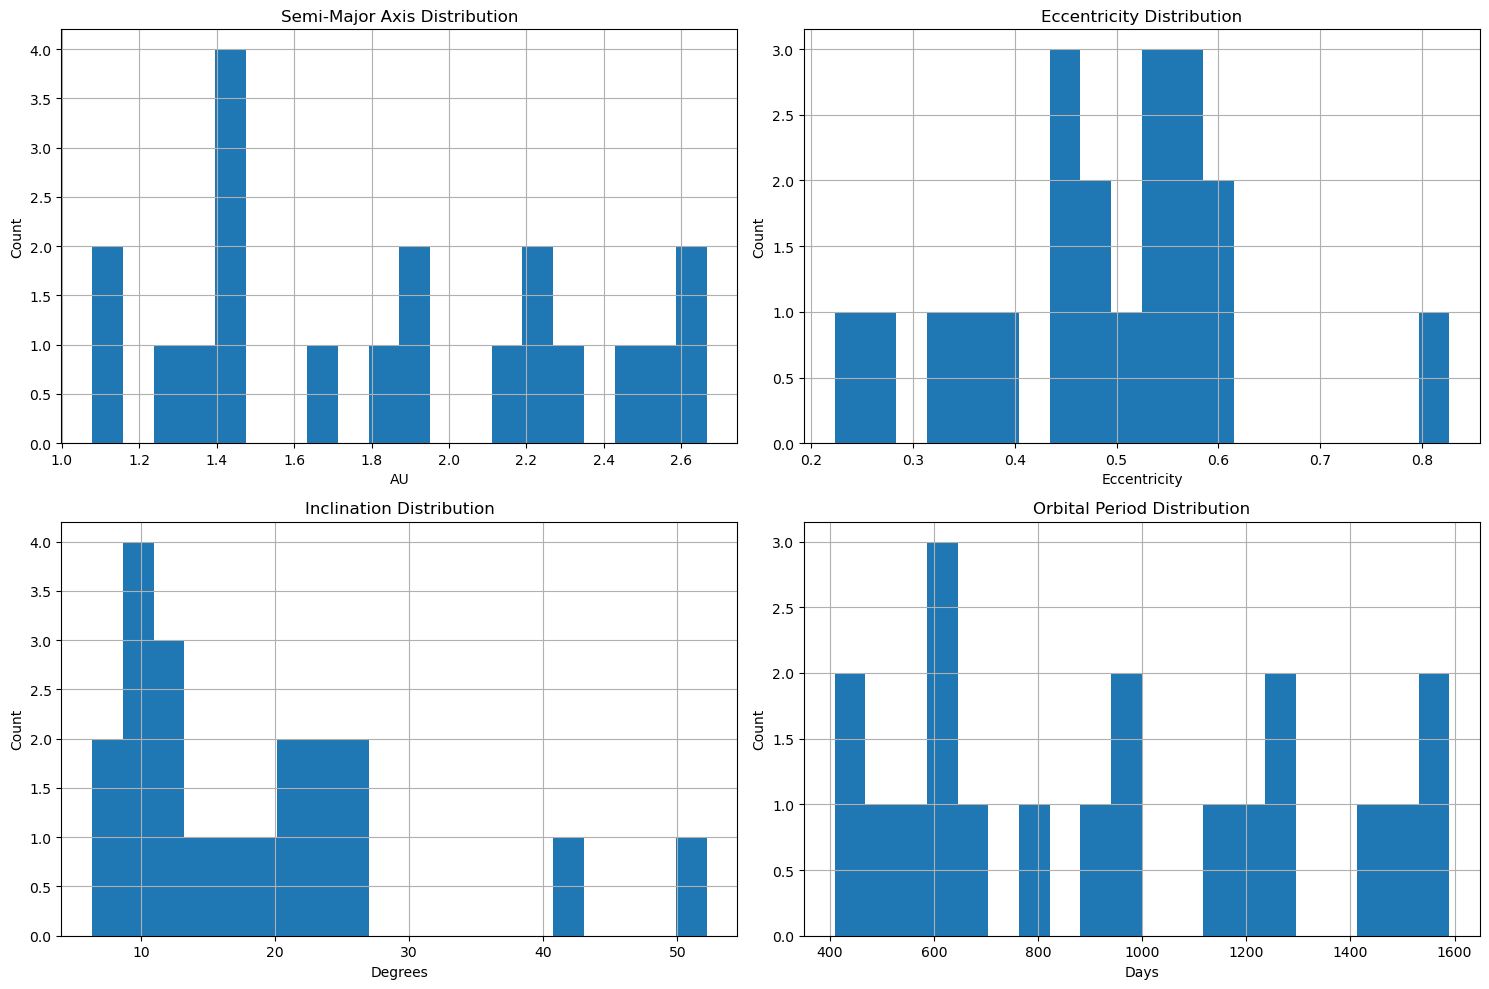

In [11]:

plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
df['semi_major_axis'].astype(float).hist(bins=20)
plt.title('Semi-Major Axis Distribution')
plt.xlabel('AU')
plt.ylabel('Count')

plt.subplot(2, 2, 2)
df['eccentricity'].astype(float).hist(bins=20)
plt.title('Eccentricity Distribution')
plt.xlabel('Eccentricity')
plt.ylabel('Count')

plt.subplot(2, 2, 3)
df['inclination'].astype(float).hist(bins=20)
plt.title('Inclination Distribution')
plt.xlabel('Degrees')
plt.ylabel('Count')

plt.subplot(2, 2, 4)
df['orbital_period'] = df['orbital_period'].astype(float)
df['orbital_period'].hist(bins=20)
plt.title('Orbital Period Distribution')
plt.xlabel('Days')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

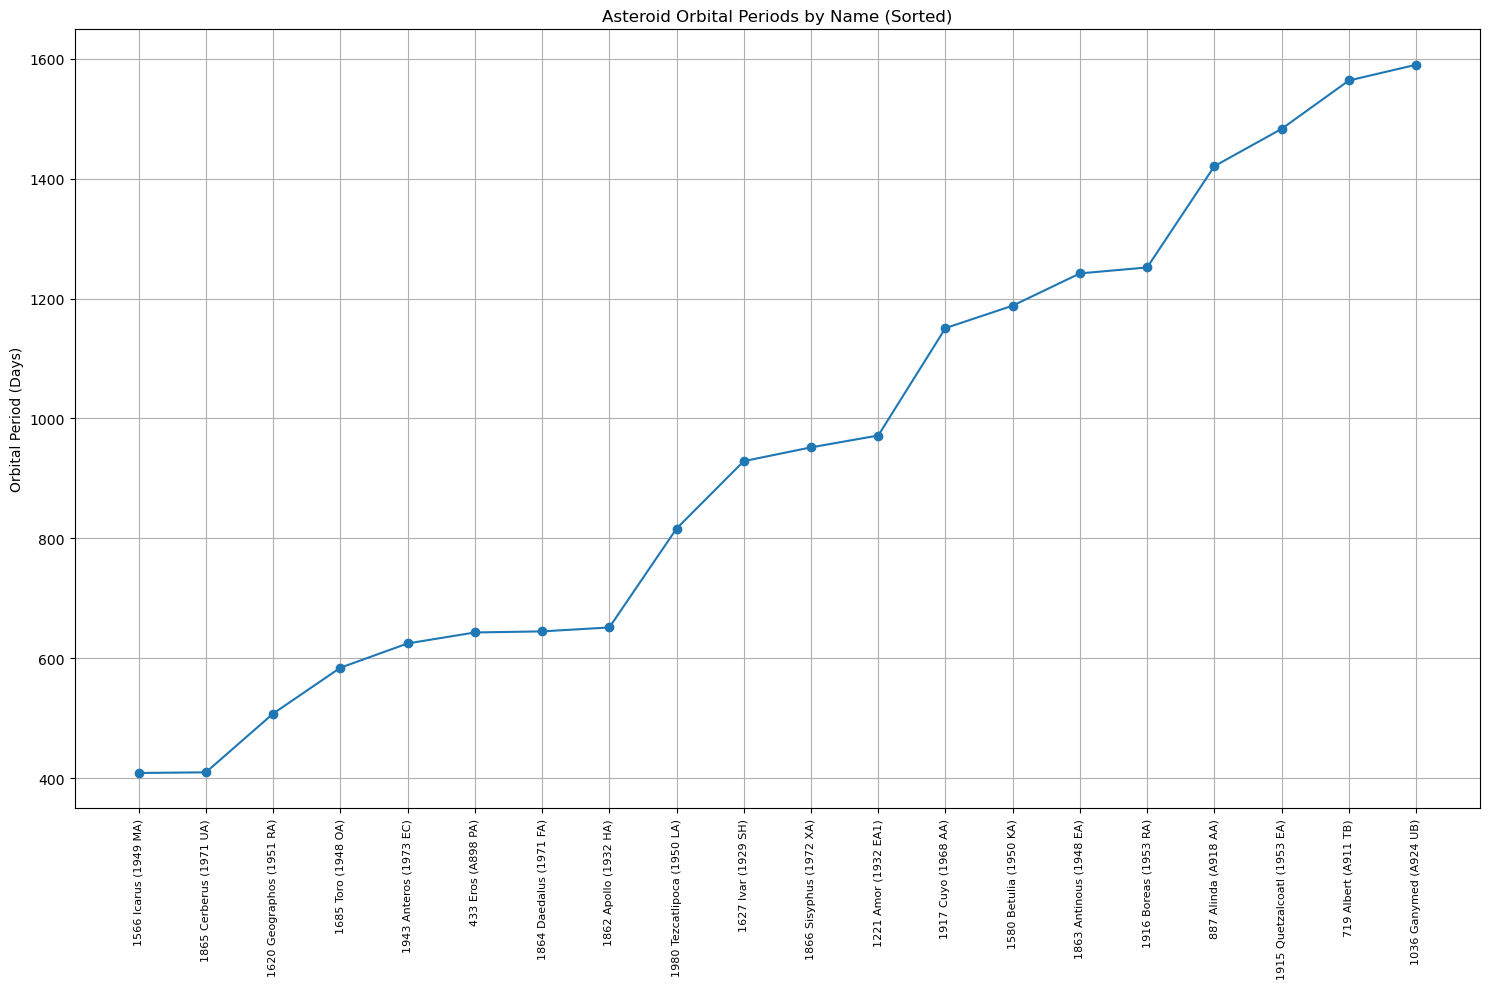

In [12]:
df_sorted = df.sort_values('orbital_period')
plt.figure(figsize=(15, 10))
plt.plot(df_sorted['name'], df_sorted['orbital_period'], marker='o')
plt.xticks(rotation=90, fontsize=8)
plt.ylabel('Orbital Period (Days)')
plt.title('Asteroid Orbital Periods by Name (Sorted)')
plt.tight_layout()
plt.grid(True)
plt.show()

In [13]:
# ========================================================================== 3D Plotly Figure ==========================================================================

In [30]:
import plotly.graph_objects as go

fig = go.Figure()

# Add Earth's orbit (1 AU circular reference)
theta = np.linspace(0, 2 * np.pi, 500)
x_earth = np.cos(theta)
y_earth = np.sin(theta)
z_earth = np.zeros_like(theta)
fig.add_trace(go.Scatter3d(x=x_earth, y=y_earth, z=z_earth, mode='lines', name="Earth's Orbit", line=dict(color='blue', dash='dash')))

# Add Sun at the origin
fig.add_trace(go.Scatter3d(x=[0], y=[0], z=[0], mode='markers', marker=dict(size=5, color='yellow'), name='Sun'))

# Plot orbits
for idx, asteroid in df.iterrows():
    try:
        a = float(asteroid["semi_major_axis"])
        e = float(asteroid["eccentricity"])
        i = np.radians(float(asteroid["inclination"]))
        Omega = np.radians(float(asteroid["ascending_node_longitude"]))
        omega = np.radians(float(asteroid["perihelion_argument"]))

        nu = np.linspace(0, 2 * np.pi, 500)
        r = (a * (1 - e ** 2)) / (1 + e * np.cos(nu))

        x = (np.cos(Omega) * np.cos(omega + nu) - np.sin(Omega) * np.sin(omega + nu) * np.cos(i)) * r
        y = (np.sin(Omega) * np.cos(omega + nu) + np.cos(Omega) * np.sin(omega + nu) * np.cos(i)) * r
        z = r * np.sin(omega + nu) * np.sin(i)

        fig.add_trace(go.Scatter3d(
            x=x, y=y, z=z,
            mode='lines',
            name=asteroid['name'],
            line=dict(width=2),
            hovertemplate=f"Name: {asteroid['name']}<br>SMA: {a:.2f} AU<br>Ecc: {e:.2f}<br>Incl: {np.degrees(i):.2f}°<extra></extra>"            
        ))
    except Exception as ex:
        print(f"Skipped {asteroid['name']} due to error: {ex}")

# Display / Styling
fig.update_layout(
    title={
        'text':'Interactive 3D Visualization of Near-Earth Asteroids in Heliocentric Orbits',
        'x':0.5,
    },
    scene=dict(
        xaxis_title='X (AU)',
        yaxis_title='Y (AU)',
        zaxis_title='Z (AU)',
        aspectmode='data',
        xaxis=dict(showbackground=True, backgroundcolor='rgba(255,255,255,0.02)', gridcolor='gray', zerolinecolor='white', showspikes=False),
        yaxis=dict(showbackground=True, backgroundcolor='rgba(255,255,255,0.02)', gridcolor='gray', zerolinecolor='white', showspikes=False),
        zaxis=dict(showbackground=True, backgroundcolor='rgba(255,255,255,0.02)', gridcolor='gray', zerolinecolor='white', showspikes=False)
    ),
    legend=dict(
        bgcolor='rgba(0,0,0,0.5)',
        bordercolor='white',
        borderwidth=1,
        font=dict(color='white', size=12),
        y=0.5
    ),
    font=dict(color='white', size=14, family='Arial'),
    paper_bgcolor='black',
    scene_bgcolor='black',
    width=1500,
    height=1000
)

fig.show()


In [31]:
# Convert fig to html for sharing
fig.write_html("asteroid_orbit_plot.html")